<a href="https://colab.research.google.com/github/girlstalkmath-umd/patterns-and-fractals/blob/master/Cobweb_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cobweb Plots
The following is an exercise showing cobweb plots of the logistic map,
$$f(x) = r x (x-1).$$
In these plots, we ask whether the solution converges to an attractive fixed point or diverges to inifinity. In some cases it appears to do neither. Run all the code below. Experiment with the plot_cobweb function by increasing the parameter $r$ and/or changing the initial value, $x$ as inputs in the last cell. Rerun the last cell to study the behavior of different families of the $r$ parameter.

In [0]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt


def plot_cobweb(f, r, x0, nmax=40):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    dpi = 100
    x = np.linspace(0, 1, 500)
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, r), c='#444444', lw=2)
    ax.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1], r)
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x)$')
    ax.set_title('$x_0 = {:.1}, r = {:.2}$'.format(x0, r))



Define the logistic function (or any function you choose).

In [0]:
def f(x, r):
    return r*x*(1-x)

Define our initial condition $x_0$ and parameter $r$.

In [0]:
x0 = 0.2
r = 2.8

Make a cobweb plot.


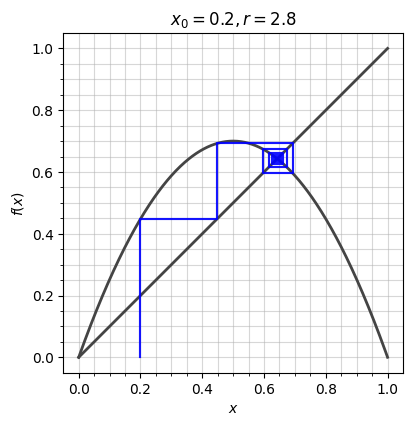

In [111]:
plot_cobweb(f, r, x0)

Now let's take a look at that in a different way. Here we plot the logistic map iterations as a function of time. 

In [0]:
def plot_iter(f, r, x0, nmax=40):
    """Make a iteration plot.

    Plot iteration number vs. f(x; r) starting at x = x0. 
    r is a parameter to the function.

    """

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    iter, fx = np.empty((2,nmax))
    iter[0], fx[0] = 0, x0
    for n in range(1, nmax):
        iter[n] = n
        fx[n] = f(fx[n-1], r)

    # Plot the path traced out by the iteration.
    plt.plot(iter, fx, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('$x_0 = {:.1}, r = {:.2}$'.format(x0, r))
    return fx[nmax-1]


0.642844152356439


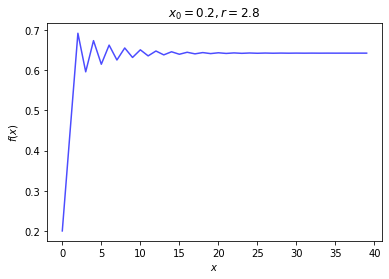

In [113]:
last_iter = plot_iter(f, r, x0)
print(last_iter) 

Look how the last iteration value compares to the point the cobweb map converges (or diverges) to. 